In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def subgradient_method(f, subgradf, t0, max_iter, x_init, stepsize_decay = True):
# inputs: f (objecive function)
#         subgradf (subgradient function)
#         t0 (initial step size)
#         max_iter (max number of iterations)
#         x_init (initialization)

    x = x_init
    x_opt = x
    f_opt = f(x)
    x_history = [x]           # container for iterate history
    f_history = [f(x)]          # container for objective value history
    k = 1
    tk = t0
    while k < max_iter:
        # take gradient descent step
        subgrad = subgradf(x)        # evaluate the gradient of f at x
        
        if stepsize_decay:            
            tk = t0/np.sqrt(k)       # diminishing step size
            
        x = x - tk*subgrad           
        
        
        # record x_opt and f_opt
        if f(x) < f_opt:
            x_opt = x
            f_opt = f(x)
            
            
        # record x and f(x)
        x_history.append(x)
        f_history.append(f(x))
        k += 1
        
    return x_opt, f_opt, x_history, f_history

In [8]:
def proximal_gradient(f,g, gradg, t0,lambda_, max_iter, x_init,stepsize_decay = True):
#.        alpha (step size)
#         max_iter (max number of iterations)
#         x_init (initialization)
    x = x_init
    x_opt1 = x
    f_opt1 = f(x)
    x_history1 = [x]           # container for iterate history
    f_history1 = [f(x)]          # container for objective value history
    k = 1
    tk = t0

    while  k < max_iter :
        # take gradient descent step
        grad = gradg(x)        # evaluate the gradient of g at x
        v = x - tk*grad
        if stepsize_decay:            
            tk = t0/np.sqrt(k)       # diminishing step size
        #take proximal step    
        x = np.sign(v)*np.maximum(0,np.abs(v)-tk * lambda_)
        
        # record x_opt and f_opt
        if f(x) < f_opt1:
            x_opt1 = x
            f_opt1 = f(x)
            
        # record x and f(x)
        x_history1.append(x)
        f_history1.append(f(x))
        k += 1
    return x_opt1, f_opt1, x_history1, f_history1

Minimize LASSO problem:
\begin{equation}
f\left(\mathbf{x}\right) \colon= \frac{1}{2} * ||Ax - b||^2 + \lambda||x||_1
\end{equation} 

In [3]:
#define A and b
lambda_ = 10**(-3)
A = np.zeros((64,256))
for i in range(64):
    for j in range(256):
        A[i][j] = 1/np.sqrt(64) * np.cos((2*i*j*(np.pi)**2)/64)
z = np.zeros(256)
l = [12,35,38,129,136,150,170,207,232,243]
for i in (l):
    z[i] = 1
b = np.dot(A,z)

In [4]:
gradg = lambda x : (A.T).dot(A.dot(x)-b)
g = lambda x: 1/2 * (np.linalg.norm(A.dot(x) - b))**2 

In [5]:

f = lambda x:  1/2 * (np.linalg.norm(A.dot(x) - b))**2 + lambda_ * (np.linalg.norm(x,1))

subgradf = lambda x: A.transpose().dot(A.dot(x) - b) + lambda_ * np.sign(x)

#### Diminishing step size

Initialization at $\mathbf{x}^0 = (3,3,3,...3)$.

In [13]:
max_iter = 200
t0 = .05
x_init =  np.ones(256)
x_opt, f_opt, x_history, f_history = subgradient_method(f, subgradf, t0, max_iter, x_init)

print(f_opt)

0.0462000370282525


In [15]:

x_opt1, f_opt1, x_history1, f_history1 = proximal_gradient(f,g, gradg, t0,lambda_, max_iter, x_init,stepsize_decay = True)
print(f_opt1)

0.039891238484099215


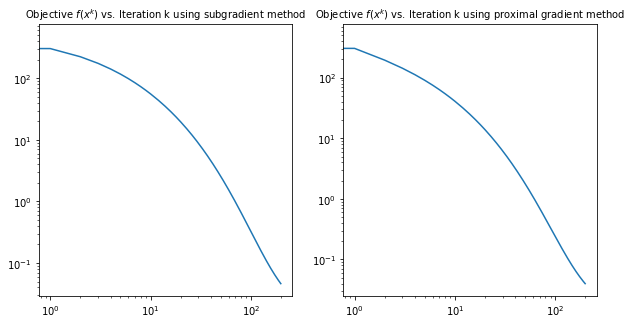

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].loglog(f_history)
ax[0].set_title('Objective $f(x^k)$ vs. Iteration k using subgradient method', fontsize = 10);
ax[1].loglog(f_history1)
ax[1].set_title('Objective $f(x^k)$ vs. Iteration k using proximal gradient method', fontsize = 10);


we can see from the graph that proximal gradient method decay/convergence faster.